# Normalization vs Standardization

## Normalization(min-max Normalization)
In this approach we will scale down the values of the features between 0 to 1.

# X normalized = (X – X minimum) / (X maximum – X minimum)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=["Class","Alcohol","Malic"]
df.head()

,Class,Alcohol,Malic
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
scaling=MinMaxScaler()

In [5]:
scaling.fit_transform(df[['Alcohol','Malic']])

array([[0.84210526, 0.1916996 ],
       [0.57105263, 0.2055336 ],
       [0.56052632, 0.3201581 ],
       [0.87894737, 0.23913043],
       [0.58157895, 0.36561265],
       [0.83421053, 0.20158103],
       [0.88421053, 0.22332016],
       [0.79736842, 0.27865613],
       [1.        , 0.17786561],
       [0.74473684, 0.12055336],
       [0.80789474, 0.28063241],
       [0.81315789, 0.14624506],
       [0.71578947, 0.19565217],
       [0.97894737, 0.19565217],
       [0.88157895, 0.22332016],
       [0.68421053, 0.21146245],
       [0.86052632, 0.23320158],
       [0.73684211, 0.16403162],
       [0.83157895, 0.16798419],
       [0.68684211, 0.46640316],
       [0.79736842, 0.17588933],
       [0.5       , 0.60474308],
       [0.70526316, 0.22134387],
       [0.47894737, 0.16996047],
       [0.65      , 0.21146245],
       [0.53157895, 0.25889328],
       [0.62105263, 0.20355731],
       [0.59736842, 0.19367589],
       [0.74736842, 0.22924901],
       [0.78684211, 0.18577075],
       [0.

# Standardization(Z-score Normalization)
Here aal the features will be transformed in such a way that it will have the properties of a standard normal distribution with mean(µ)=0 and standard deviation(σ)=1

## z = (x-μ)/σ

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaling=StandardScaler()

In [8]:
scaling.fit_transform(df[['Alcohol','Malic']])

array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377],
       [ 1.48155459, -0.51736664],
       [ 1.71625494, -0.4186237 ],
       [ 1.3086175 , -0.16727801],
       [ 2.25977152, -0.62508622],
       [ 1.0615645 , -0.88540853],
       [ 1.3580281 , -0.15830138],
       [ 1.38273339, -0.76871232],
       [ 0.92568536, -0.54429654],
       [ 2.16095032, -0.54429654],
       [ 1.70390229, -0.4186237 ],
       [ 0.77745356, -0.47248348],
       [ 1.60508109, -0.37374054],
       [ 1.02450655, -0.68792264],
       [ 1.46920194, -0.66996938],
       [ 0.78980621,  0.68550197],
       [ 1.3086175 , -0.63406285],
       [-0.08723191,  1.31386618],
       [ 0.87627476, -0.42760033],
       [-0.18605311, -0.66099274],
       [ 0.61686912, -0.47248348],
       [ 0.06099988, -0.25704433],
       [ 0.48098997, -0.50839001],
       [ 0.36981612, -0.55327317],
       [ 1.07391715,

* Standardization - Perform better in Machine Learning Algorithms like KNN.
* Normalization - Perform better in Deep Learning Techniques like Nueral Networks.

# One Hot Encoding - variables with many categories

In [9]:
data=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [10]:
for col in data.columns:
    print(col,':',len(data[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


In [11]:
pd.get_dummies(data,drop_first=True).shape

(4209, 117)

In [12]:
data.X2.value_counts().sort_values(ascending=False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
k       25
i       25
b       21
ao      20
ag      19
z       19
Name: X2, dtype: int64

In [13]:
top_10=[x for x in data.X2.value_counts().sort_values(ascending=False).head(10).index]
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [14]:
for label in top_10:
    data[label]=np.where(data['X2']==label,1,0)

data[['X2']+top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [15]:
def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]=np.where(data[variable]==label,1,0)
        
data=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5','X6'])
one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [16]:
top_10=[x for x in data.X1.value_counts().sort_values(ascending=False).head(10).index]
one_hot_top_x(data,'X1',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Count or Frequency Encoding
## High Cardinality
##### Another way to refer to variables that have a multiple of categories,is to call them variables with High cardinality.
##### If we have categorical variables containing many multiple labels or high cardinality,then by using one hot encoding,we will expand the feature space dramatically.
##### One approach that is heavily used in Kaggle competitions,is to replace each label of the categorical variable by the count,this is the amount of times each label appears in the dataset.Or the frequency,this is the percentage of observations within that category .The 2 are equivalent.
### Let's see how this works:

In [17]:
import pandas as pd
import numpy as np

In [18]:
df=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [19]:
df.shape

(4209, 2)

### One Hot Encoding

In [20]:
pd.get_dummies(df).shape

(4209, 71)

In [21]:
len(df['X1'].unique())

27

In [22]:
len(df['X2'].unique())

44

In [23]:
for col in df.columns[0:]:
    print(col,':',len(df[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels


In [24]:
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'k': 25,
 'i': 25,
 'b': 21,
 'ao': 20,
 'ag': 19,
 'z': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'al': 5,
 'q': 5,
 'an': 5,
 'ah': 4,
 'p': 4,
 'av': 4,
 'au': 3,
 'ar': 1,
 'af': 1,
 'l': 1,
 'j': 1,
 'c': 1,
 'o': 1,
 'am': 1,
 'aa': 1}

In [25]:
df_frequency_map=df.X2.value_counts().to_dict()

In [26]:
df.X2.head()

0    at
1    av
2     n
3     n
4     n
Name: X2, dtype: object

In [27]:
df.X2=df.X2.map(df_frequency_map)
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137


In [28]:
df_frequency_map=df.X1.value_counts().to_dict()

In [29]:
df.X1.head()

0    v
1    t
2    w
3    t
4    v
Name: X1, dtype: object

In [30]:
df.X1=df.X1.map(df_frequency_map)
df.head()

,X1,X2
0,408,6
1,31,4
2,52,137
3,31,137
4,408,137


# Ordinal numbering encoding or Label Encoding
### Ordinal Categorical Variables
Ordinal data is a categorical,statistical data type where the variables have natural,ordered categories and the distances between the categories is not known.

* EXamples Of Categories....
* Nominal *: Pen,Pencil,Erasor,Cow,Dog,Cat etc.
* Ordinal *: Excellent,Good,Bad,Fantastic,Okay,Don't like etc.

#### Other Examples.
1. Student's grade in an exam(A,B,C or fail).
2. Educational level,with the categories:Elementary school,High school,College graduate,PhD ranked from 1 to 4.

When the categorical variables are ordinal,the most straightforward best approach is to replace the labels by some ordinal number based on the ranks.

In [31]:
import pandas as pd
import datetime

In [32]:
df_base=datetime.datetime.today()
df_date_list=[df_base - datetime.timedelta(days=x) for x in range(0,20)]
df=pd.DataFrame(df_date_list)
df.columns=['day']
df

,day
0,2020-09-30 13:10:49.542989
1,2020-09-29 13:10:49.542989
2,2020-09-28 13:10:49.542989
3,2020-09-27 13:10:49.542989
4,2020-09-26 13:10:49.542989
5,2020-09-25 13:10:49.542989
6,2020-09-24 13:10:49.542989
7,2020-09-23 13:10:49.542989
8,2020-09-22 13:10:49.542989
9,2020-09-21 13:10:49.542989


In [33]:
df['day_of_week']=df['day'].dt.day_name()
df.head()

,day,day_of_week
0,2020-09-30 13:10:49.542989,Wednesday
1,2020-09-29 13:10:49.542989,Tuesday
2,2020-09-28 13:10:49.542989,Monday
3,2020-09-27 13:10:49.542989,Sunday
4,2020-09-26 13:10:49.542989,Saturday


In [34]:
weekday_map={
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}
df['day_ordinal']=df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2020-09-30 13:10:49.542989,Wednesday,3
1,2020-09-29 13:10:49.542989,Tuesday,2
2,2020-09-28 13:10:49.542989,Monday,1
3,2020-09-27 13:10:49.542989,Sunday,7
4,2020-09-26 13:10:49.542989,Saturday,6
5,2020-09-25 13:10:49.542989,Friday,5
6,2020-09-24 13:10:49.542989,Thursday,4
7,2020-09-23 13:10:49.542989,Wednesday,3
8,2020-09-22 13:10:49.542989,Tuesday,2
9,2020-09-21 13:10:49.542989,Monday,1


# Missing Values - Feature Engineering

### Lifecycle of a Data Science Projects...

1. Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
2. Feature Engineering---Handling Missing Values

### Why are their Missing values?? Survey--Depression Survey
1. They hesitate to put down the information
2. Survey informations are not that valid
3. Men--salary
4. Women---age
5. People may have died----NAN


Data Science Projects---Dataset should be collected from multiple sources


### What are the different types of Missing Data?
##### 1. Missing Completely at Random, MCAR: 
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [35]:
import pandas as pd

In [36]:
df=pd.read_csv('train.csv')

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
df.isnull().sum() # NOT MCAR

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df[df['Embarked'].isnull()] # MCAR

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### 2. Missing Data Not At Random(MNAR):Systematic missing values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset. 

In [40]:
import numpy as np
df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [43]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### 3. Missing At Random(MAR)

Men---hide their salary
Women---hide their age

### All The Techniques of handling missing values...

#### 1. Mean/Median/Mode replacement.
#### 2. Random Sample Imputation.
#### 3. Capturing NAN values with a new feature.
#### 4. End of Distribution Imputation.
#### 5. Arbitrary Imputation.
#### 6. Frequent categories Imputation.

### Mean/Median/Mode Imputation.

When should we apply?
* Mean/Median imputation has the assumption that the data are missing completely at random(MCAR).
* Solve this by replacing the NAN with the most frequent occurance of the variables.

In [44]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [45]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [46]:
def impute_nan(df,variable,median):
    df[variable +"_median"]=df[variable].fillna(median)

In [47]:
median=df.Age.median()
median

28.0

In [48]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [49]:
df['Age'].std()

14.526497332334042

In [50]:
df['Age_median'].std()

13.019696550973201

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

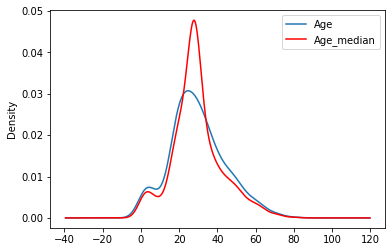

In [52]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages And Disadvantages of Mean/Median Imputation.

#### Advantages.
1. Easy to implement(Robust to Outliers)
2. Faster way to obtain the complete dataset.

#### Disadvantages.
1. Change or Distortion in the original variance.

## Random Sample Imputation
Aim : Random Sample Imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.

1.When Should it be used?
* It assumes that the data are missing completely at random(MCAR).

In [53]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [54]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [55]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [56]:
df['Age'].isnull().sum()

177

In [57]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [58]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    random_sample=df[variable].dropna().sample(df['Age'].isnull().sum(),random_state=0)
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [59]:
median=df.Age.median()

In [60]:
median

28.0

In [61]:
impute_nan(df,'Age',median)

In [62]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

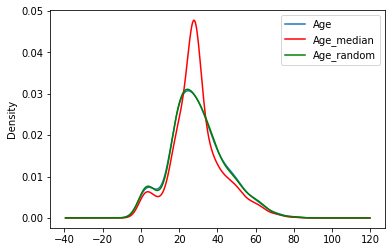

In [64]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_random.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

##### Advantages.
1. Easy To Implement.
2. There is less distortion in variance.

##### Disadvantages.
1. In Every situation randomness wouldn't work.

## Capturing NAN values with a new feature.

It works well if the data are not missing completely at random.

In [65]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [66]:
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [67]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [68]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [69]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


##### Advantages.
1. Easy To Implement.
2. Captures the importance of missing values.

##### Disadvantages.
1. Creating Additional Features(Curse of Dimensionality).

## End Of Distribution Imputation.

In [70]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


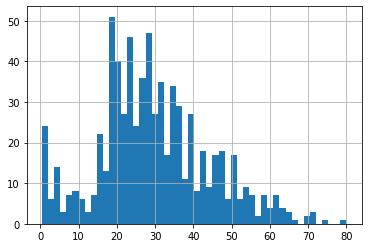

In [71]:
df.Age.hist(bins=50)

In [72]:
extreme=df.Age.mean()+3*df.Age.std()
extreme

73.27860964406094

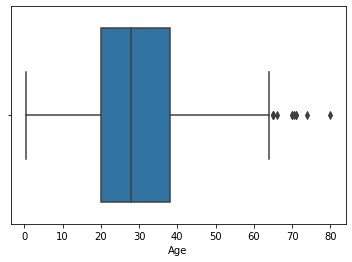

In [73]:
import seaborn as sns 
sns.boxplot('Age',data=df)

In [74]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [75]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [76]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


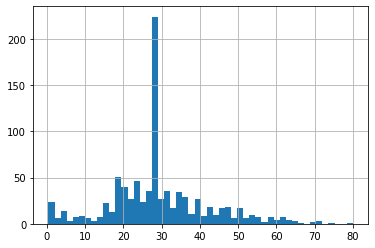

In [77]:
df['Age'].hist(bins=50)

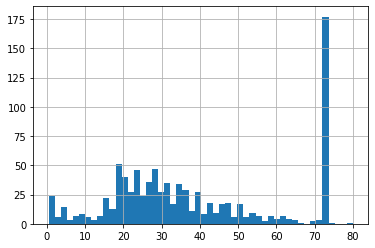

In [78]:
df['Age_end_distribution'].hist(bins=50)

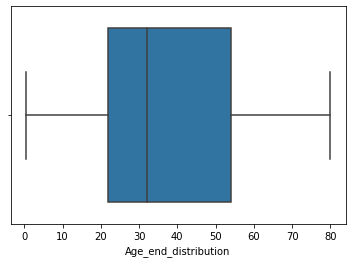

In [79]:
sns.boxplot('Age_end_distribution',data=df)

##### Advantages.
1. Easy To Implement.
2. Captures the importance of missingness if there is one.

##### Disadvantages.
1. Distorts the original distribution of the variable.
2. If missingness is not important,it may mask the predictive power of the original.
3. If the number of NA is big,it will mask true outliers in the distribution.
4. If the number of NA is small,the replaced NA may be considered an outlier and pre-processed in a subsequent step of feature engineering.

## Arbitrary Value Imputation.

It consists of replacing NAN by an arbitrary value.


In [80]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [81]:
def impute_nan(df,variable):
    df[variable+'_zero']=df[variable].fillna(0)
    df[variable+'_hundred']=df[variable].fillna(100)

###### Arbitrary values
###### It should not be more frequently present.
#### Advantages.
1. Easy to implement.
2. Captures the importance of missingness if there is one.

#### Disadvantages.
1. Distorts the original distribution of the variable.
2. If missingness is not important,it may mask the predictive power of the original variable by distorting its distribution.
3. Hard to decide which value to use.

## How to Handle Categorical Missing Values.
### Frequent Category Imputation

In [82]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [83]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [84]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [85]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

### Compute the frequency with every feature

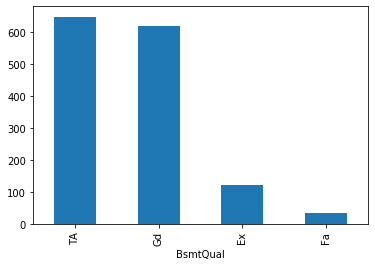

In [89]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

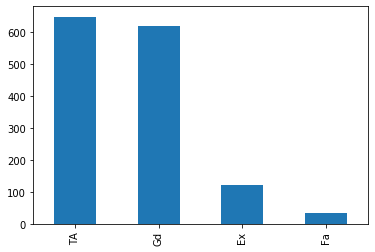

In [90]:
df['BsmtQual'].value_counts().plot.bar()

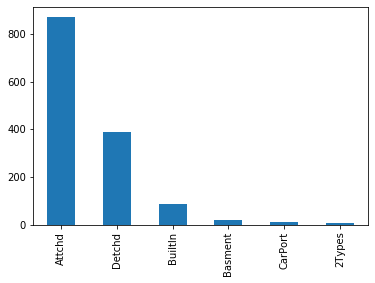

In [91]:
df['GarageType'].value_counts().plot.bar()

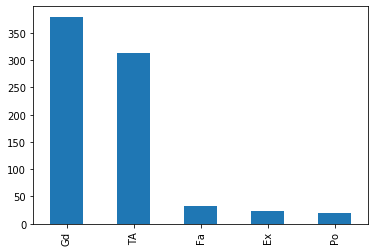

In [92]:
df['FireplaceQu'].value_counts().plot.bar()

In [95]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [102]:
df['GarageType'].mode()[0]

'Attchd'

In [103]:
def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [104]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [105]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### Advantages.
1. Easy to implement.
2. Faster way to implement.

#### Disadvantages.
1. Since we are using the more frequent labels,it may use them in an over represented way if there are many NANs.
2. It distorts the relationship of the most frequent label.

### Adding a variable to capture NAN

In [117]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [118]:
import numpy as np 
df['BsmtQual_Var']=np.where(df['BsmtQual'].isnull(),1,0)

In [119]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [120]:
frequent=df['BsmtQual'].mode()[0]

In [121]:
df['BsmtQual'].fillna(frequent,inplace=True)

In [122]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [126]:
df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [127]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_Var,FireplaceQu_Var
0,Gd,1,Attchd,208500,0,0
1,Gd,0,Attchd,181500,0,0
2,Gd,0,Attchd,223500,0,0
3,TA,0,Detchd,140000,0,0
4,Gd,0,Attchd,250000,0,0


##### Suppose if you have more frequent categories,we just replace NAN with a new category.

In [133]:
df=pd.read_csv('loan.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [134]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [135]:
def impute_nan(df,variable):
    df[variable+"_newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [136]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [137]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [139]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [140]:
df.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


### One Hot Encoding-2

In [142]:
import pandas as pd
df=pd.read_csv('train.csv',usecols=['Sex'])

In [143]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [144]:
pd.get_dummies(df).head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [145]:
pd.get_dummies(df,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [146]:
df=pd.read_csv('train.csv',usecols=['Embarked'])

In [147]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [149]:
df.dropna(inplace=True)

In [150]:
df.head()

,Embarked
0,S
1,C
2,S
3,S
4,S


In [152]:
pd.get_dummies(df,drop_first=True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


#### One Hot Encoding with many categories in a feature.

In [156]:
df=pd.read_csv('mercedesbenz.csv',usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [157]:
df.head()

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d


In [160]:
df['X0'].unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [161]:
for i in df.columns:
    print(len(df[i].unique()))

47
27
44
7
4
29
12


In [163]:
df.X1.value_counts().sort_values(ascending=False).head(10)

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
Name: X1, dtype: int64

In [165]:
lst_10=df.X1.value_counts().sort_values(ascending=False).head(10).index
lst_10=list(lst_10)

In [166]:
lst_10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [167]:
import numpy as np
for categories in lst_10:
    df[categories]=np.where(df['X1']==categories,1,0)

In [169]:
lst_10.append('X1')

In [170]:
df[lst_10]

,aa,s,b,l,v,r,i,a,c,o,X1
0,0,0,0,0,1,0,0,0,0,0,v
1,0,0,0,0,0,0,0,0,0,0,t
2,0,0,0,0,0,0,0,0,0,0,w
3,0,0,0,0,0,0,0,0,0,0,t
4,0,0,0,0,1,0,0,0,0,0,v
...,...,...,...,...,...,...,...,...,...,...,...
4204,0,1,0,0,0,0,0,0,0,0,s
4205,0,0,0,0,0,0,0,0,0,1,o
4206,0,0,0,0,1,0,0,0,0,0,v
4207,0,0,0,0,0,1,0,0,0,0,r
